## About

An [area chart](/area-plot) is a kind of line chart where the area between the x-axis and the line if filled in a given color. This chart shows the evolution of Japan's population change between 1952 and 2024.

This chart has been created by [Joseph Barbier](https://barbierjoseph.com). Thanks to him for accepting sharing its work here!

As a teaser, here is the plot we’re gonna try building:

![area plot](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/web-minimalist-area-chart.png)


## Libraries

First, we need to load the following libraries:

- [matplotlib](/matplotlib): for creating the plot
- [pandas](/pandas): for data manipulation
- [highlight_text](/advanced-custom-annotations-matplotlib): for annotations
- [pyfonts](/pyfonts) for the font
- [drawarrow](/drawarrow) for the arrows


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyfonts import load_font
from drawarrow import ax_arrow
from highlight_text import fig_text, ax_text

## Dataset

For this reproduction, we're going to retrieve the data directly from the gallery's Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [6]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/japan-population.csv"
url = "../../static/data/japan-population.csv"
df = pd.read_csv(url)
df.head()

,date,pop_var,flag
0,1952,1238290.0,False
1,1953,1135376.0,False
2,1954,1035879.0,False
3,1955,997262.0,False
4,1956,931279.0,False


## Simple area chart

An area chart consists of 2 main elements:

- the main line (added via the `plot()` function)
- the filled area (added via the `fill_between()` function, with a lower opacity)


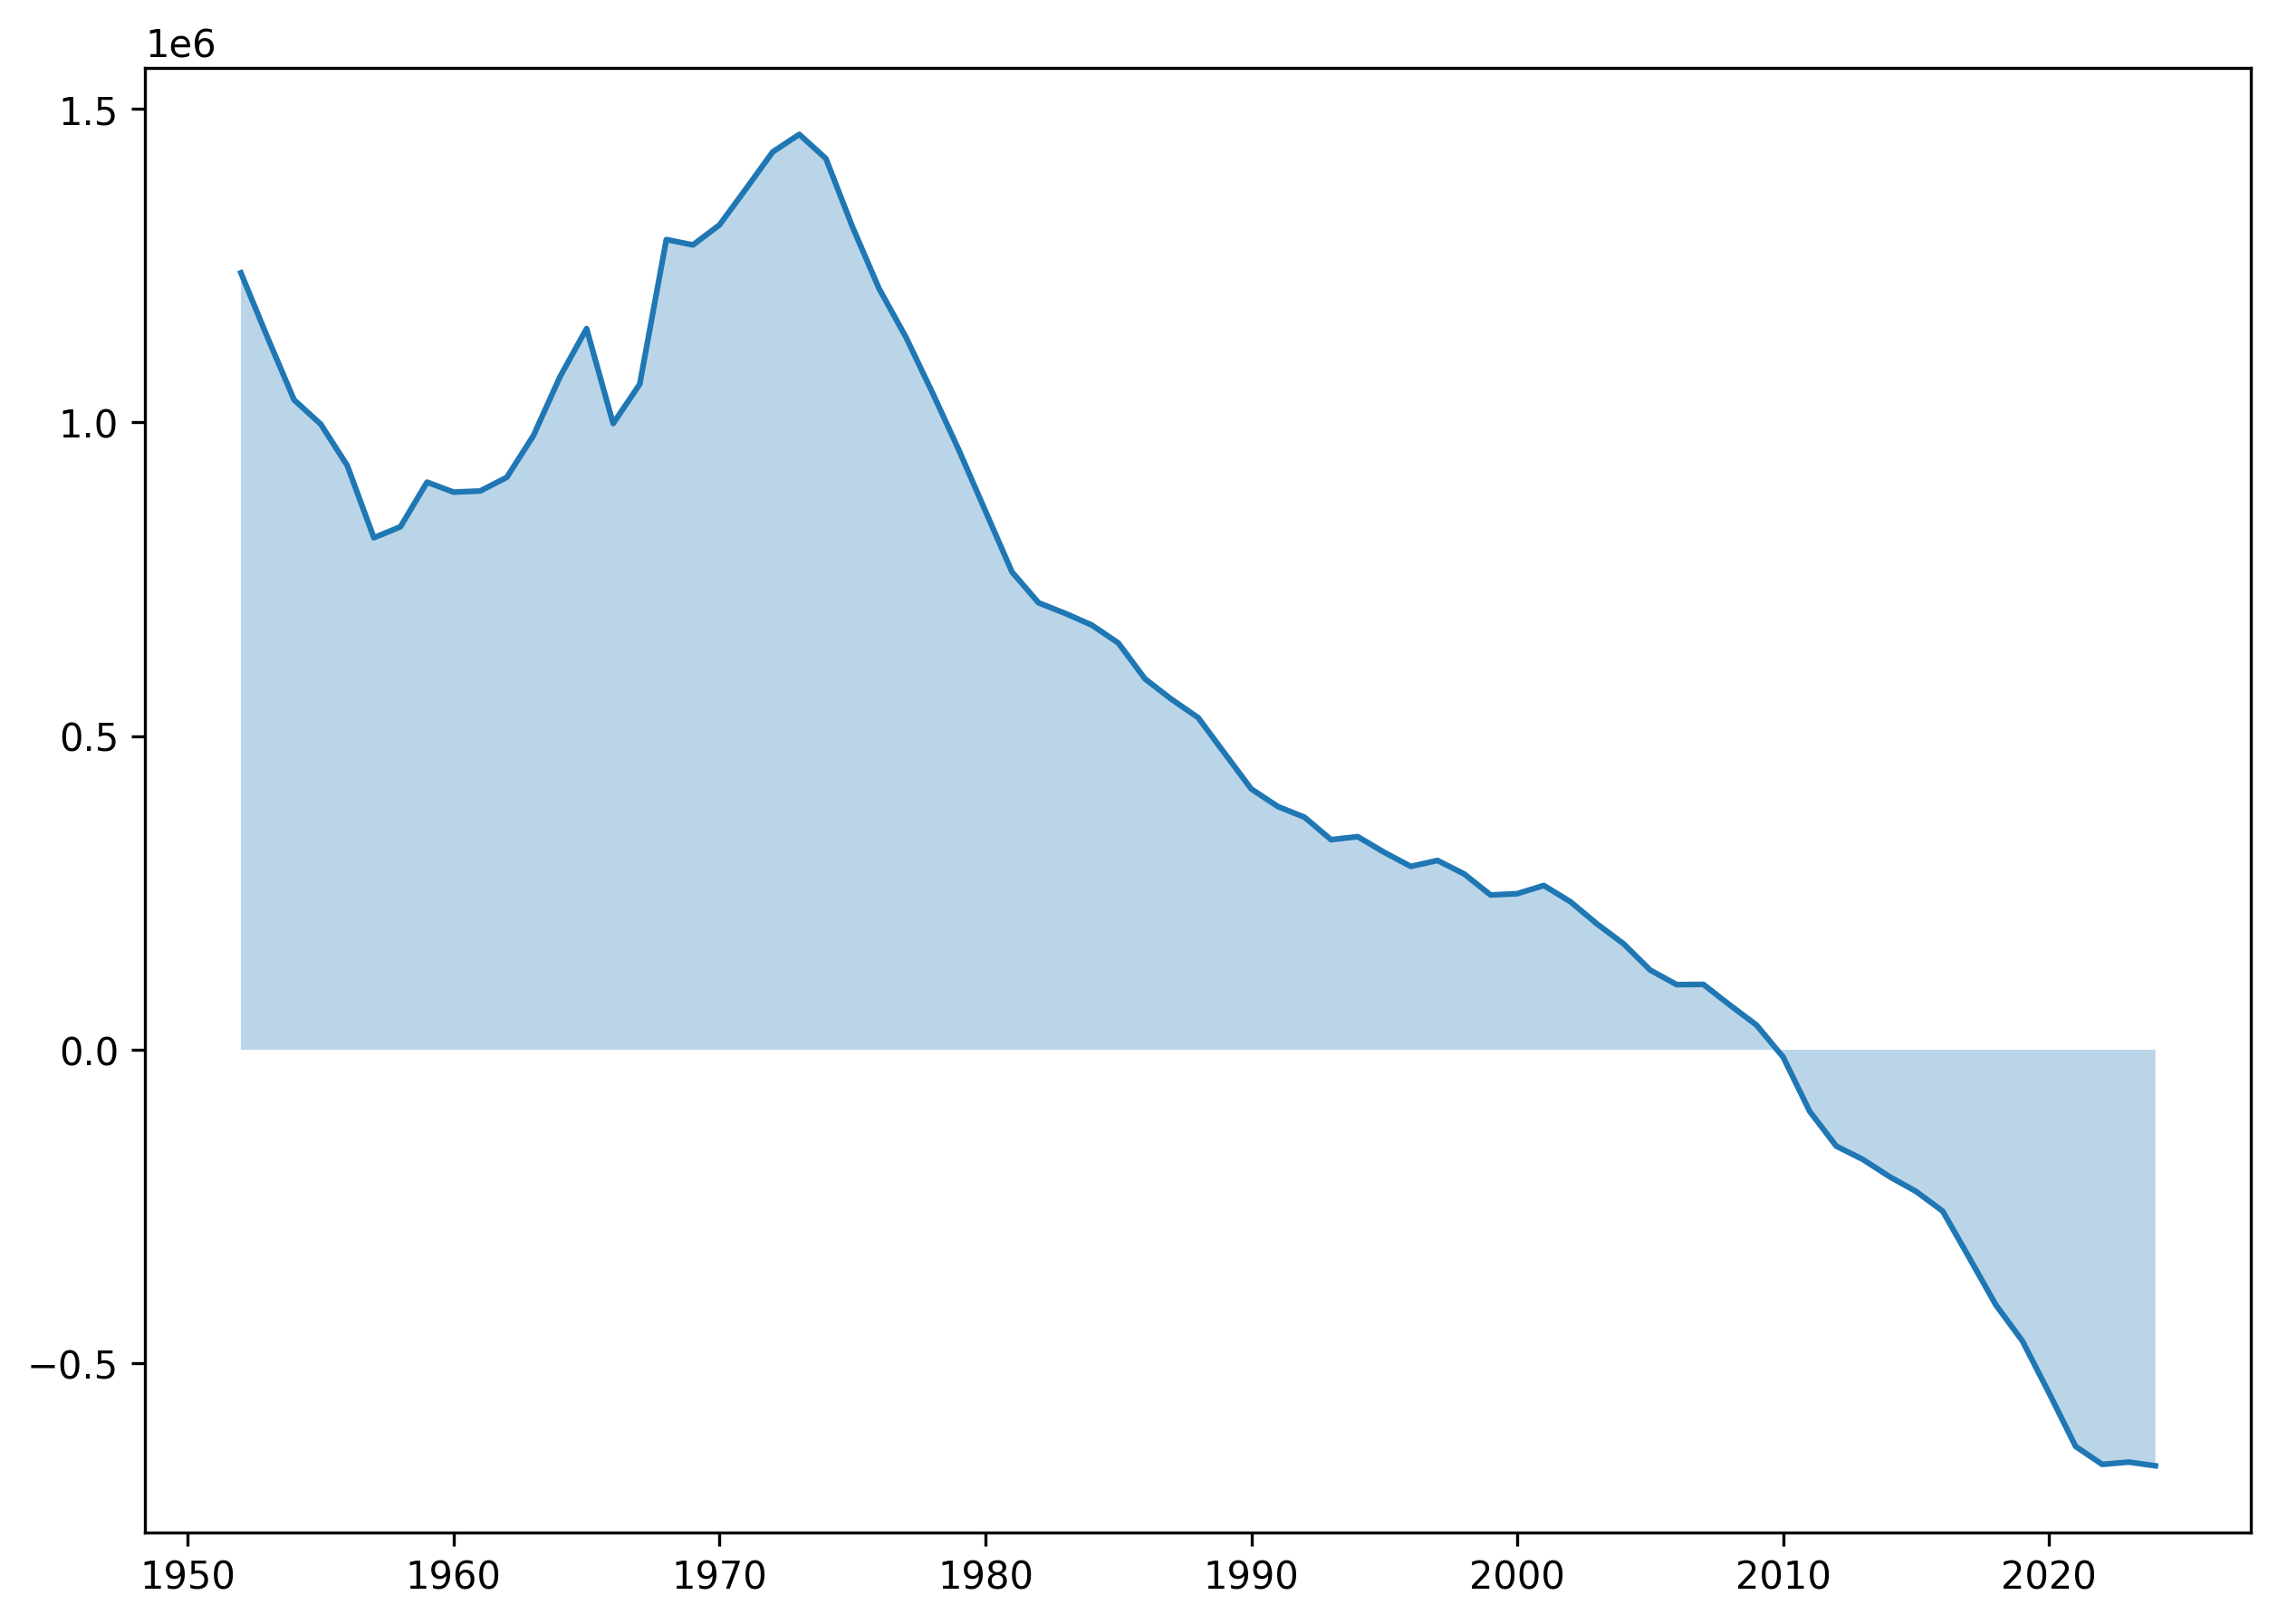

In [10]:
fig, ax = plt.subplots(dpi=300, figsize=(10,7))

ax.plot(df['date'], df['pop_var'])
ax.fill_between(df['date'], df['pop_var'], alpha=0.3)

plt.show()

## Change colors

Since there’s no built-in method to change the color based on a value, so we create **two area charts**:

- First chart: spans from the start date to `year_index` (the year when the value drops below 0).
- Second chart: spans from `year_index` to the end date.

Apply different colors to each chart, and done!


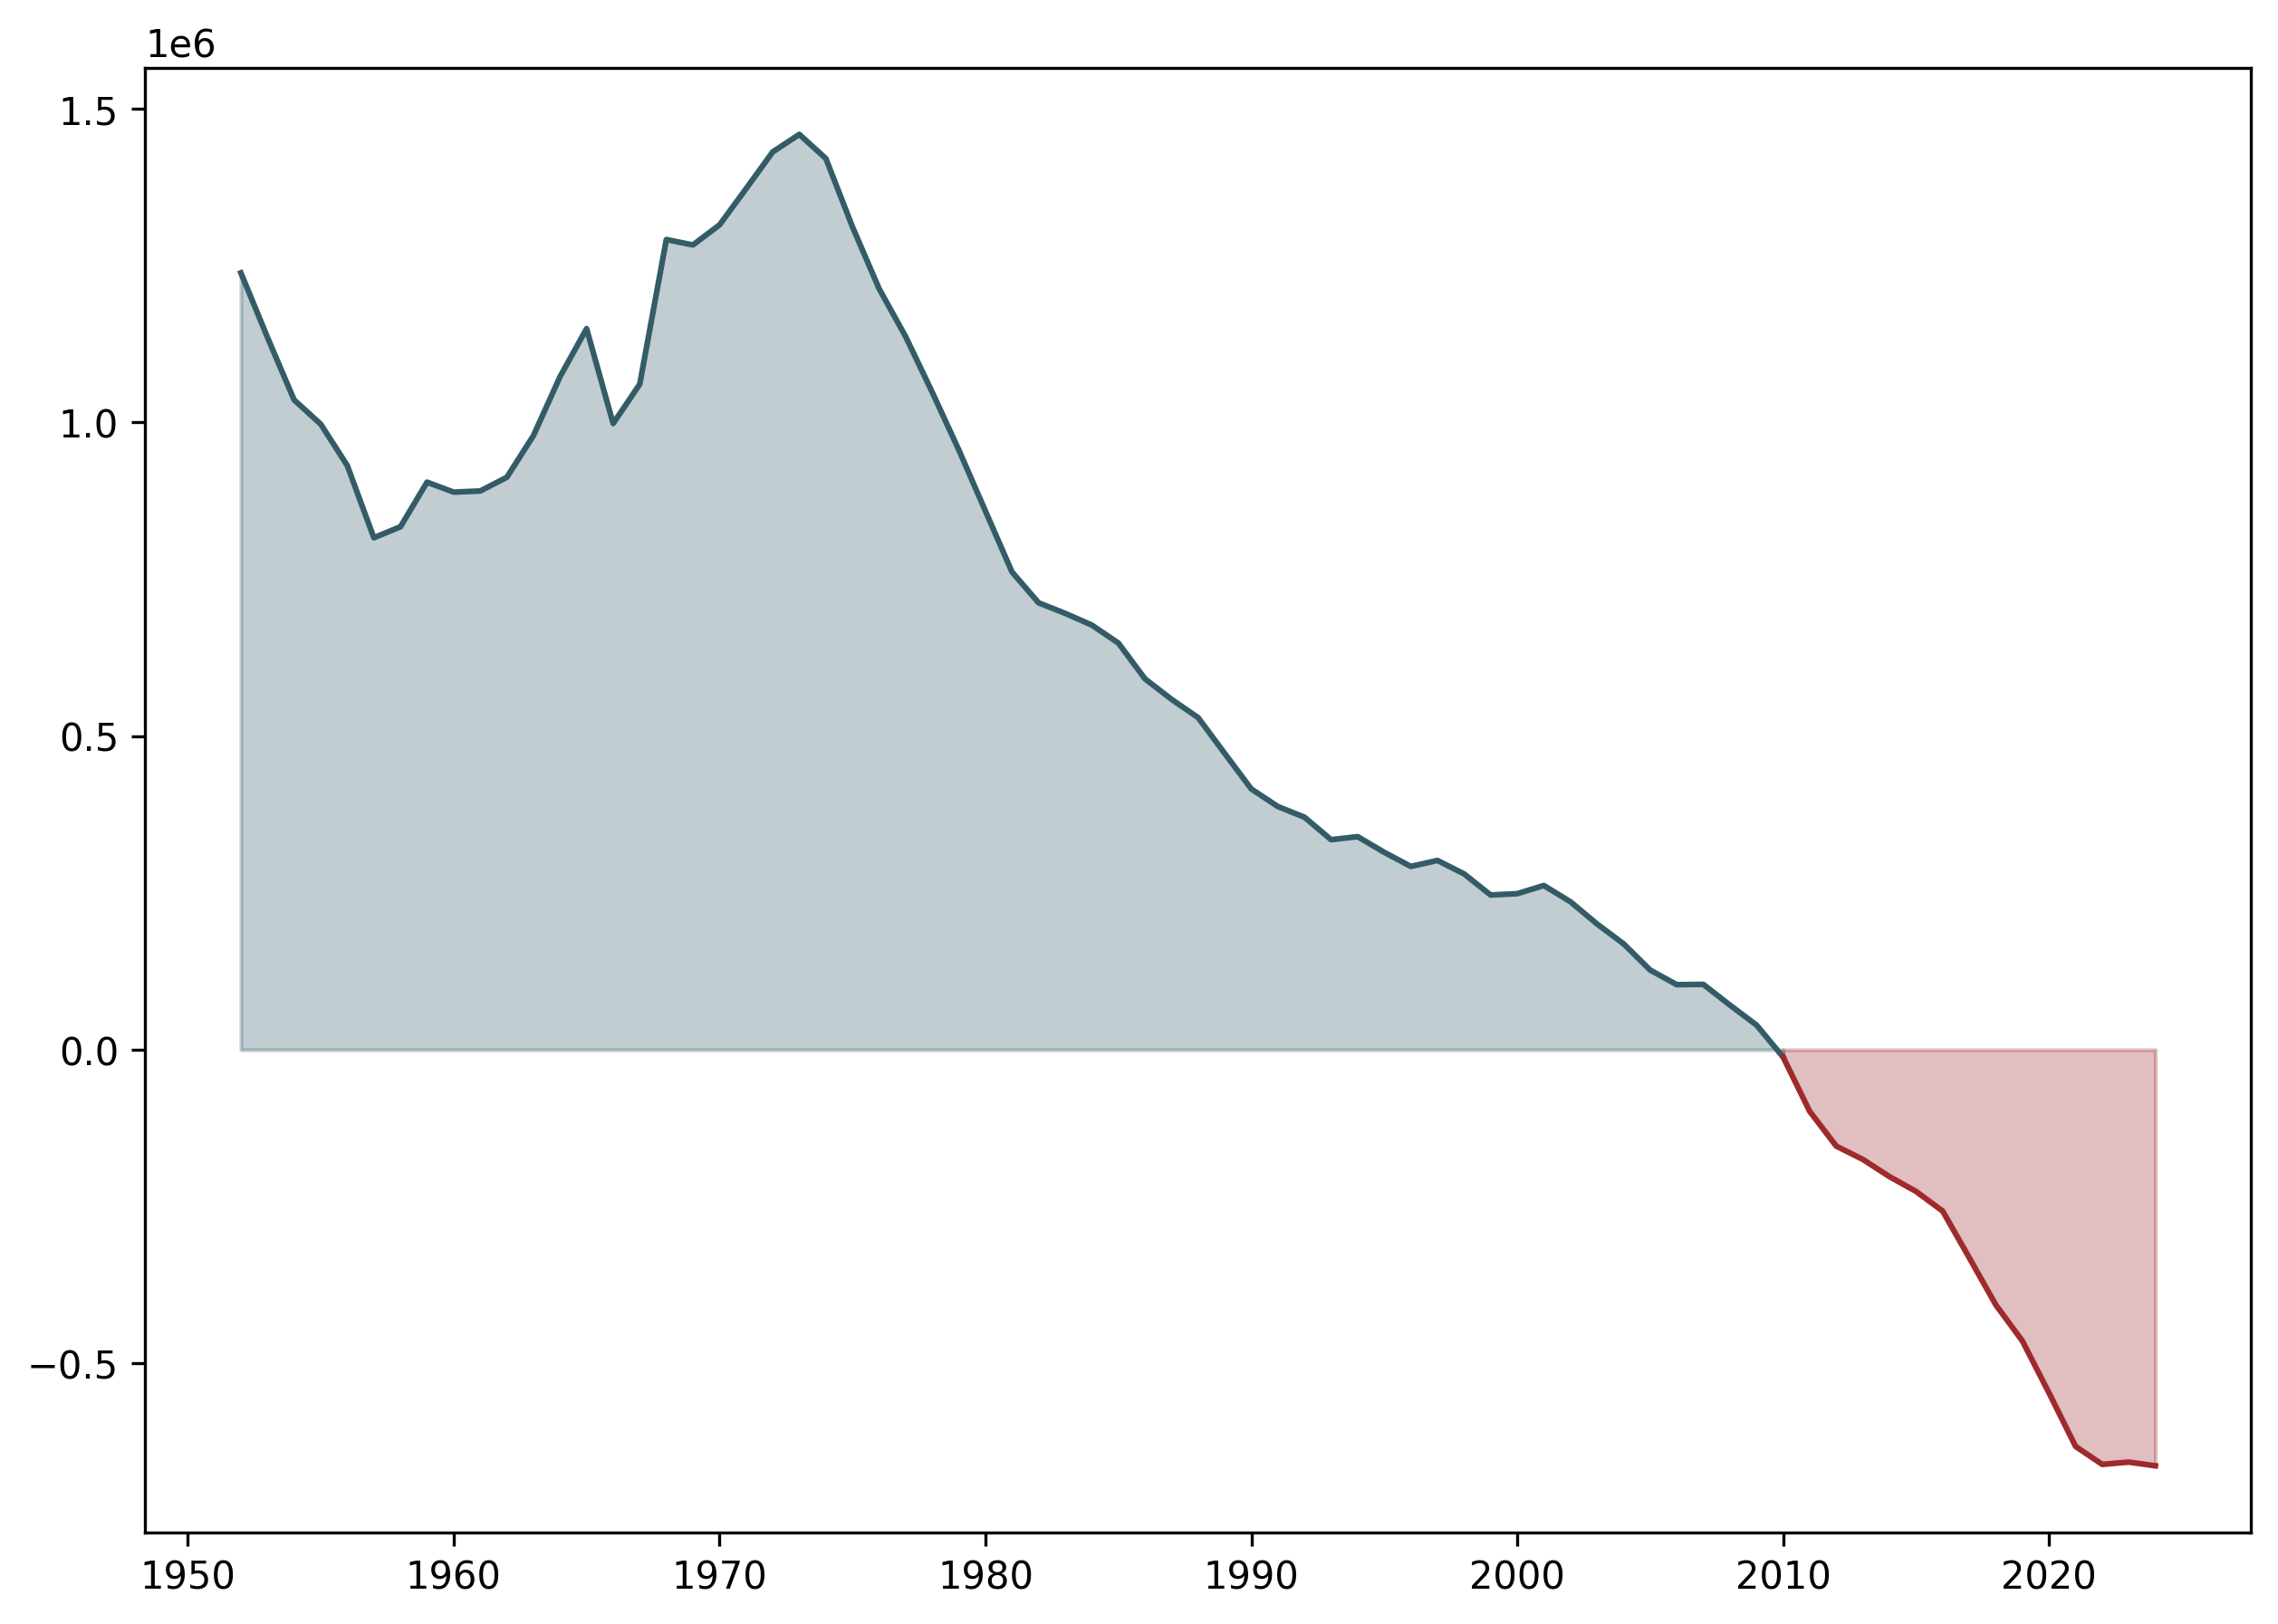

In [11]:
fig, ax = plt.subplots(dpi=300, figsize=(10,7))

year_index = df[df['flag']].date.values[0]

# before
color = '#335c67'
before_df = df[df['date']<=year_index]
ax.plot(before_df['date'], before_df['pop_var'], color=color)
ax.fill_between(before_df['date'], before_df['pop_var'], alpha=0.3, color=color)

# after
color = '#9e2a2b'
after_df = df[df['date']>=year_index]
ax.plot(after_df['date'], after_df['pop_var'], color=color)
ax.fill_between(after_df['date'], after_df['pop_var'], alpha=0.3, color=color)

plt.show()

## Customize axes

Enhance the plot with the following steps:

- Use `ax.set_axis_off()` to remove all axes.
- Load two fonts: one regular, one **bold**.
- Highlight the highest and lowest values with `scatter()` and `text()`.
- Use a `for` loop and `text()` to label all dates in the chart's center.
- Add a horizontal black line along the x-axis.


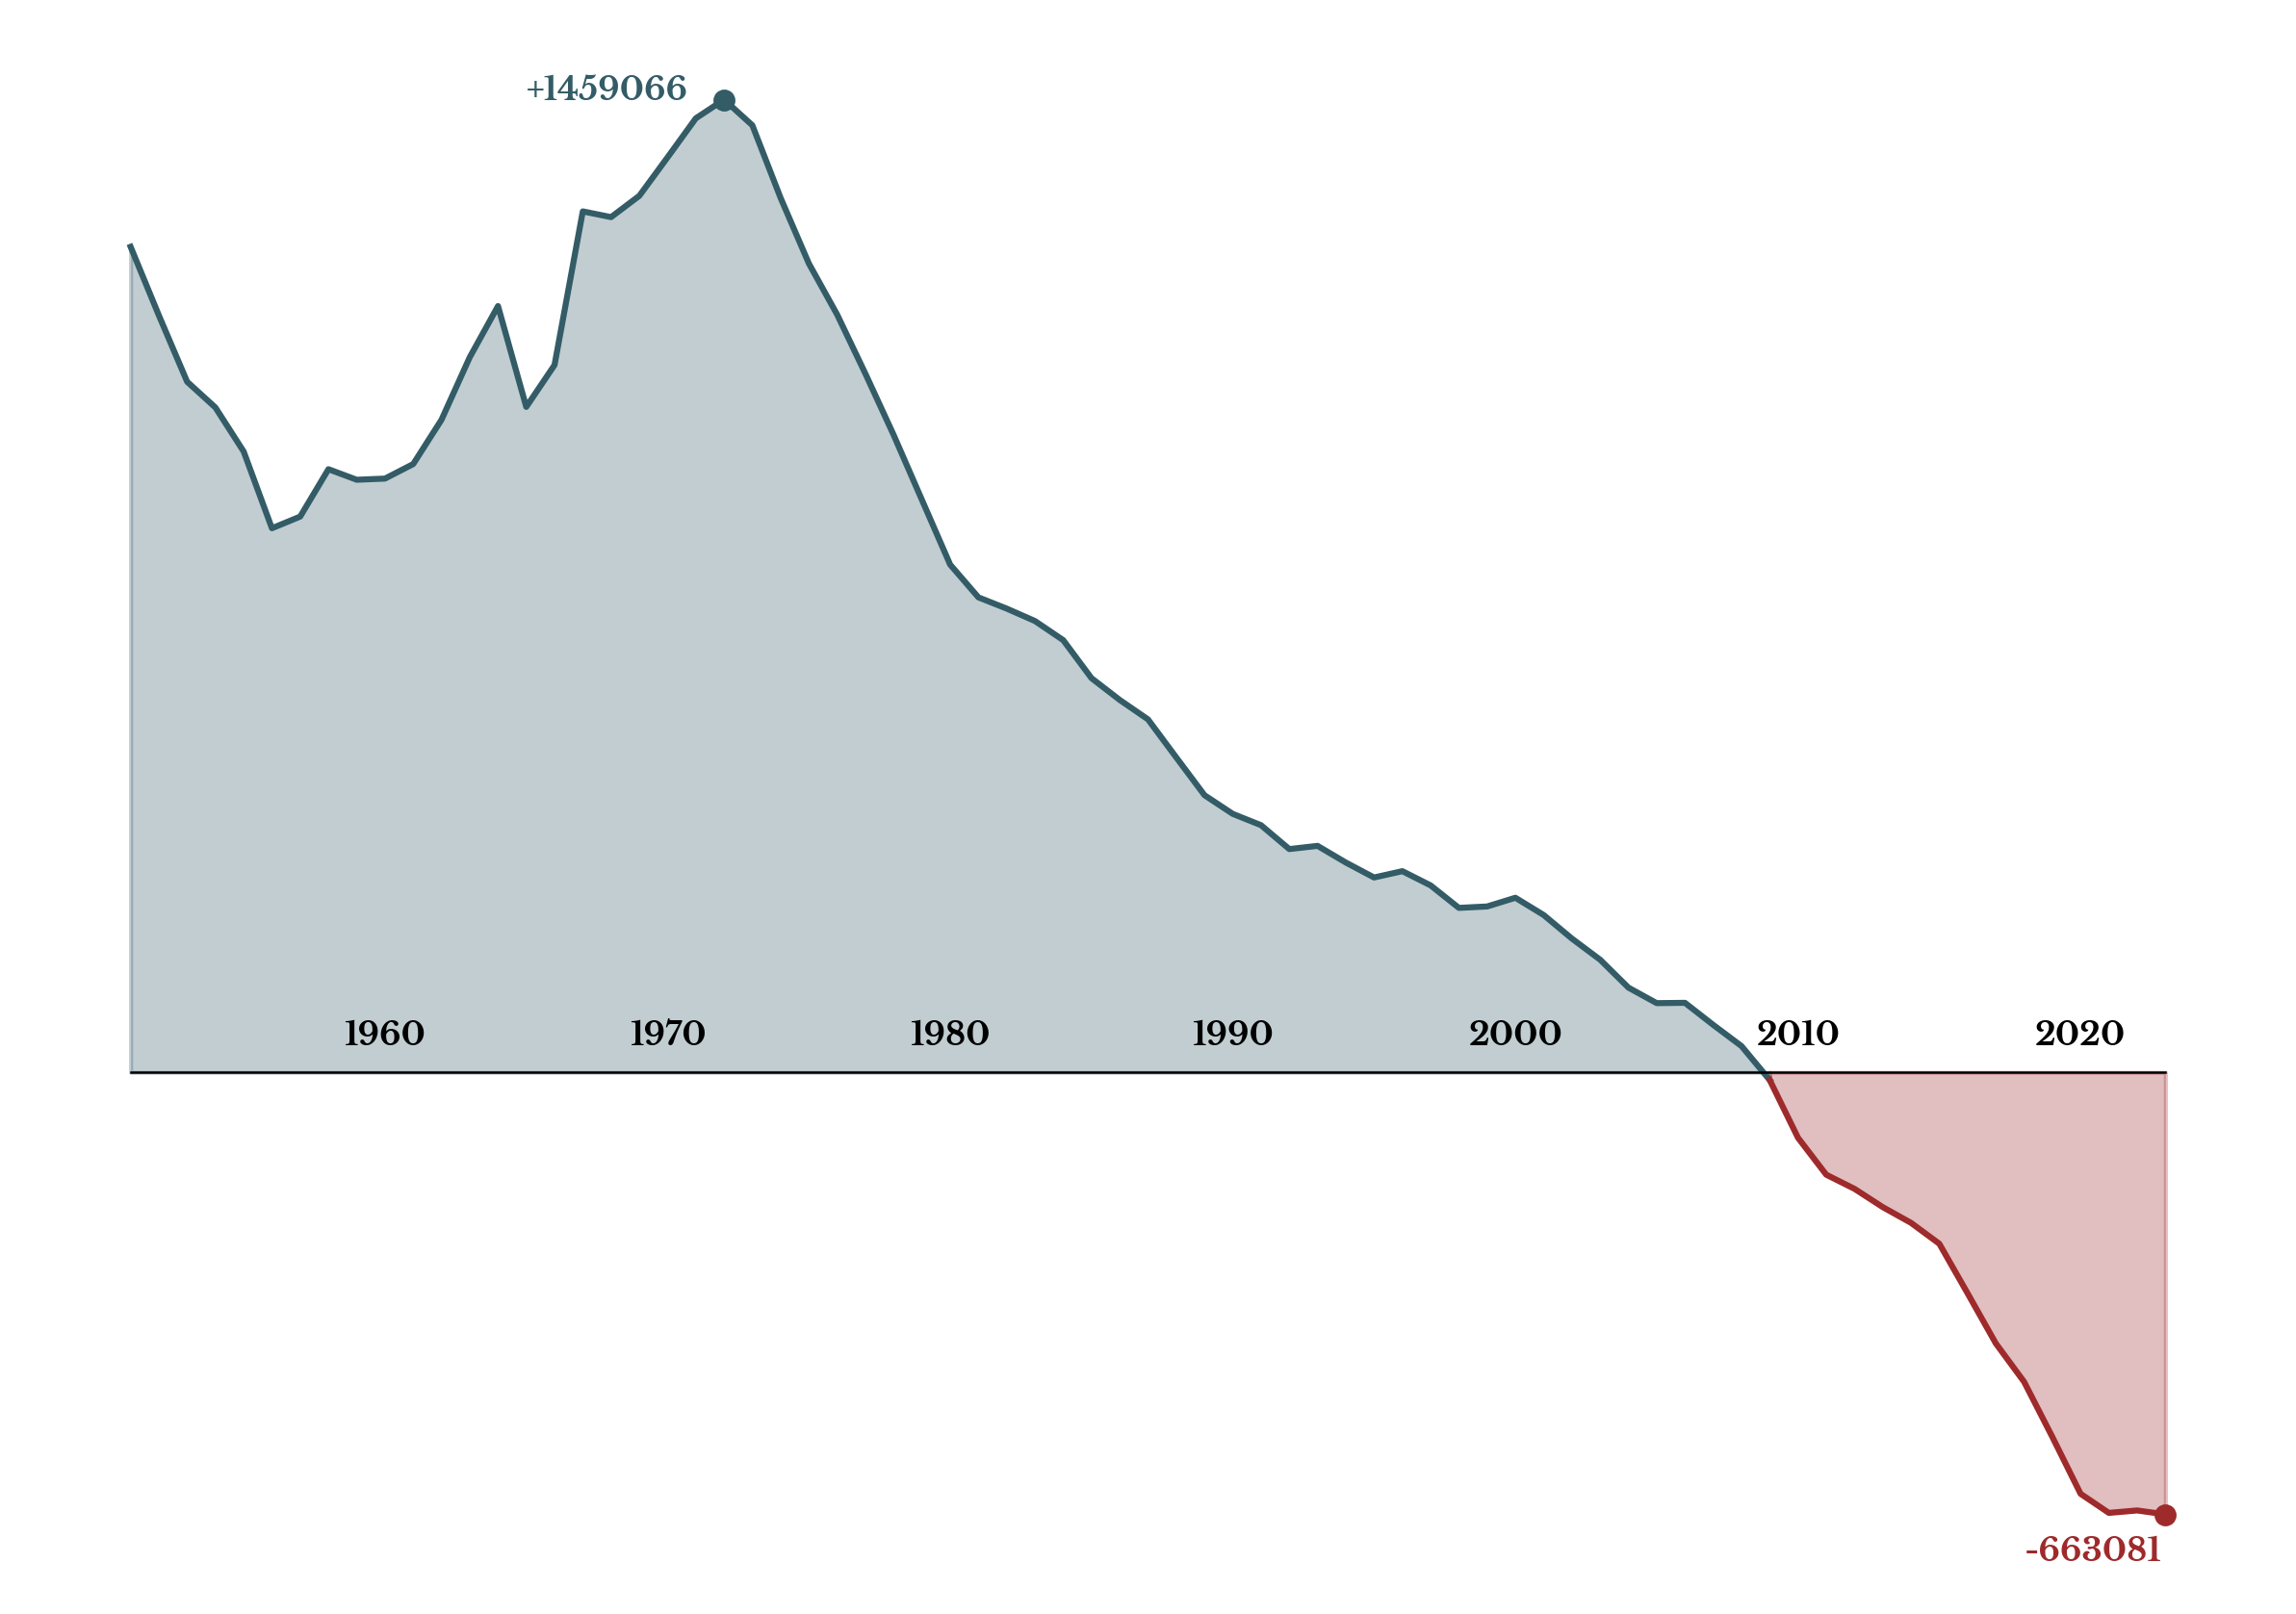

In [14]:
font = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Regular.ttf?raw=true'
)
boldfont = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Bold.ttf?raw=true'
)

fig, ax = plt.subplots(dpi=300, figsize=(10,7))
ax.set_axis_off()

year_index = df[df['flag']].date.values[0]

# before
color = '#335c67'
year_index = df[df['flag']].date.values[0]
before_df = df[df['date']<=year_index]
ax.plot(before_df['date'], before_df['pop_var'], color=color)
ax.fill_between(before_df['date'], before_df['pop_var'], alpha=0.3, color=color)
max_year = df[df['pop_var']==df['pop_var'].max()].date.values[0]
max_value = df[df['pop_var']==df['pop_var'].max()].pop_var.values[0]
ax.scatter(x=max_year, y=max_value, color=color, s=20)
ax.text(x=max_year-7, y=max_value, s=f'+{max_value:.0f}', font=boldfont, size=8, color=color)

# after
color = '#9e2a2b'
after_df = df[df['date']>=year_index]
ax.plot(after_df['date'], after_df['pop_var'], color=color)
ax.fill_between(after_df['date'], after_df['pop_var'], alpha=0.3, color=color)
min_year = df[df['pop_var']==df['pop_var'].min()].date.values[0]
min_value = df[df['pop_var']==df['pop_var'].min()].pop_var.values[0]
ax.scatter(x=min_year, y=min_value, color=color, s=20)
ax.text(x=min_year-5, y=min_value-70000, s=f'{min_value:.0f}', font=boldfont, size=8, color=color)

ax.plot([1952, 2024], [0,0], color='black', linewidth=0.6)
year_range = range(1960, 2021, 10)
for year in year_range:
   ax.text(x=year+1, y=40000, s=f'{year}', font=boldfont, size=8, ha='center')

plt.show()

## Final chart with annotations

All the part is done, now we just have to:

- add **title**, **subtitle** and **credit/source** using [highlight_text](/advanced-custom-annotations-matplotlib)
- add a specific annotation about the year 2010 with an arrow from [drawarrow](/drawarrow)


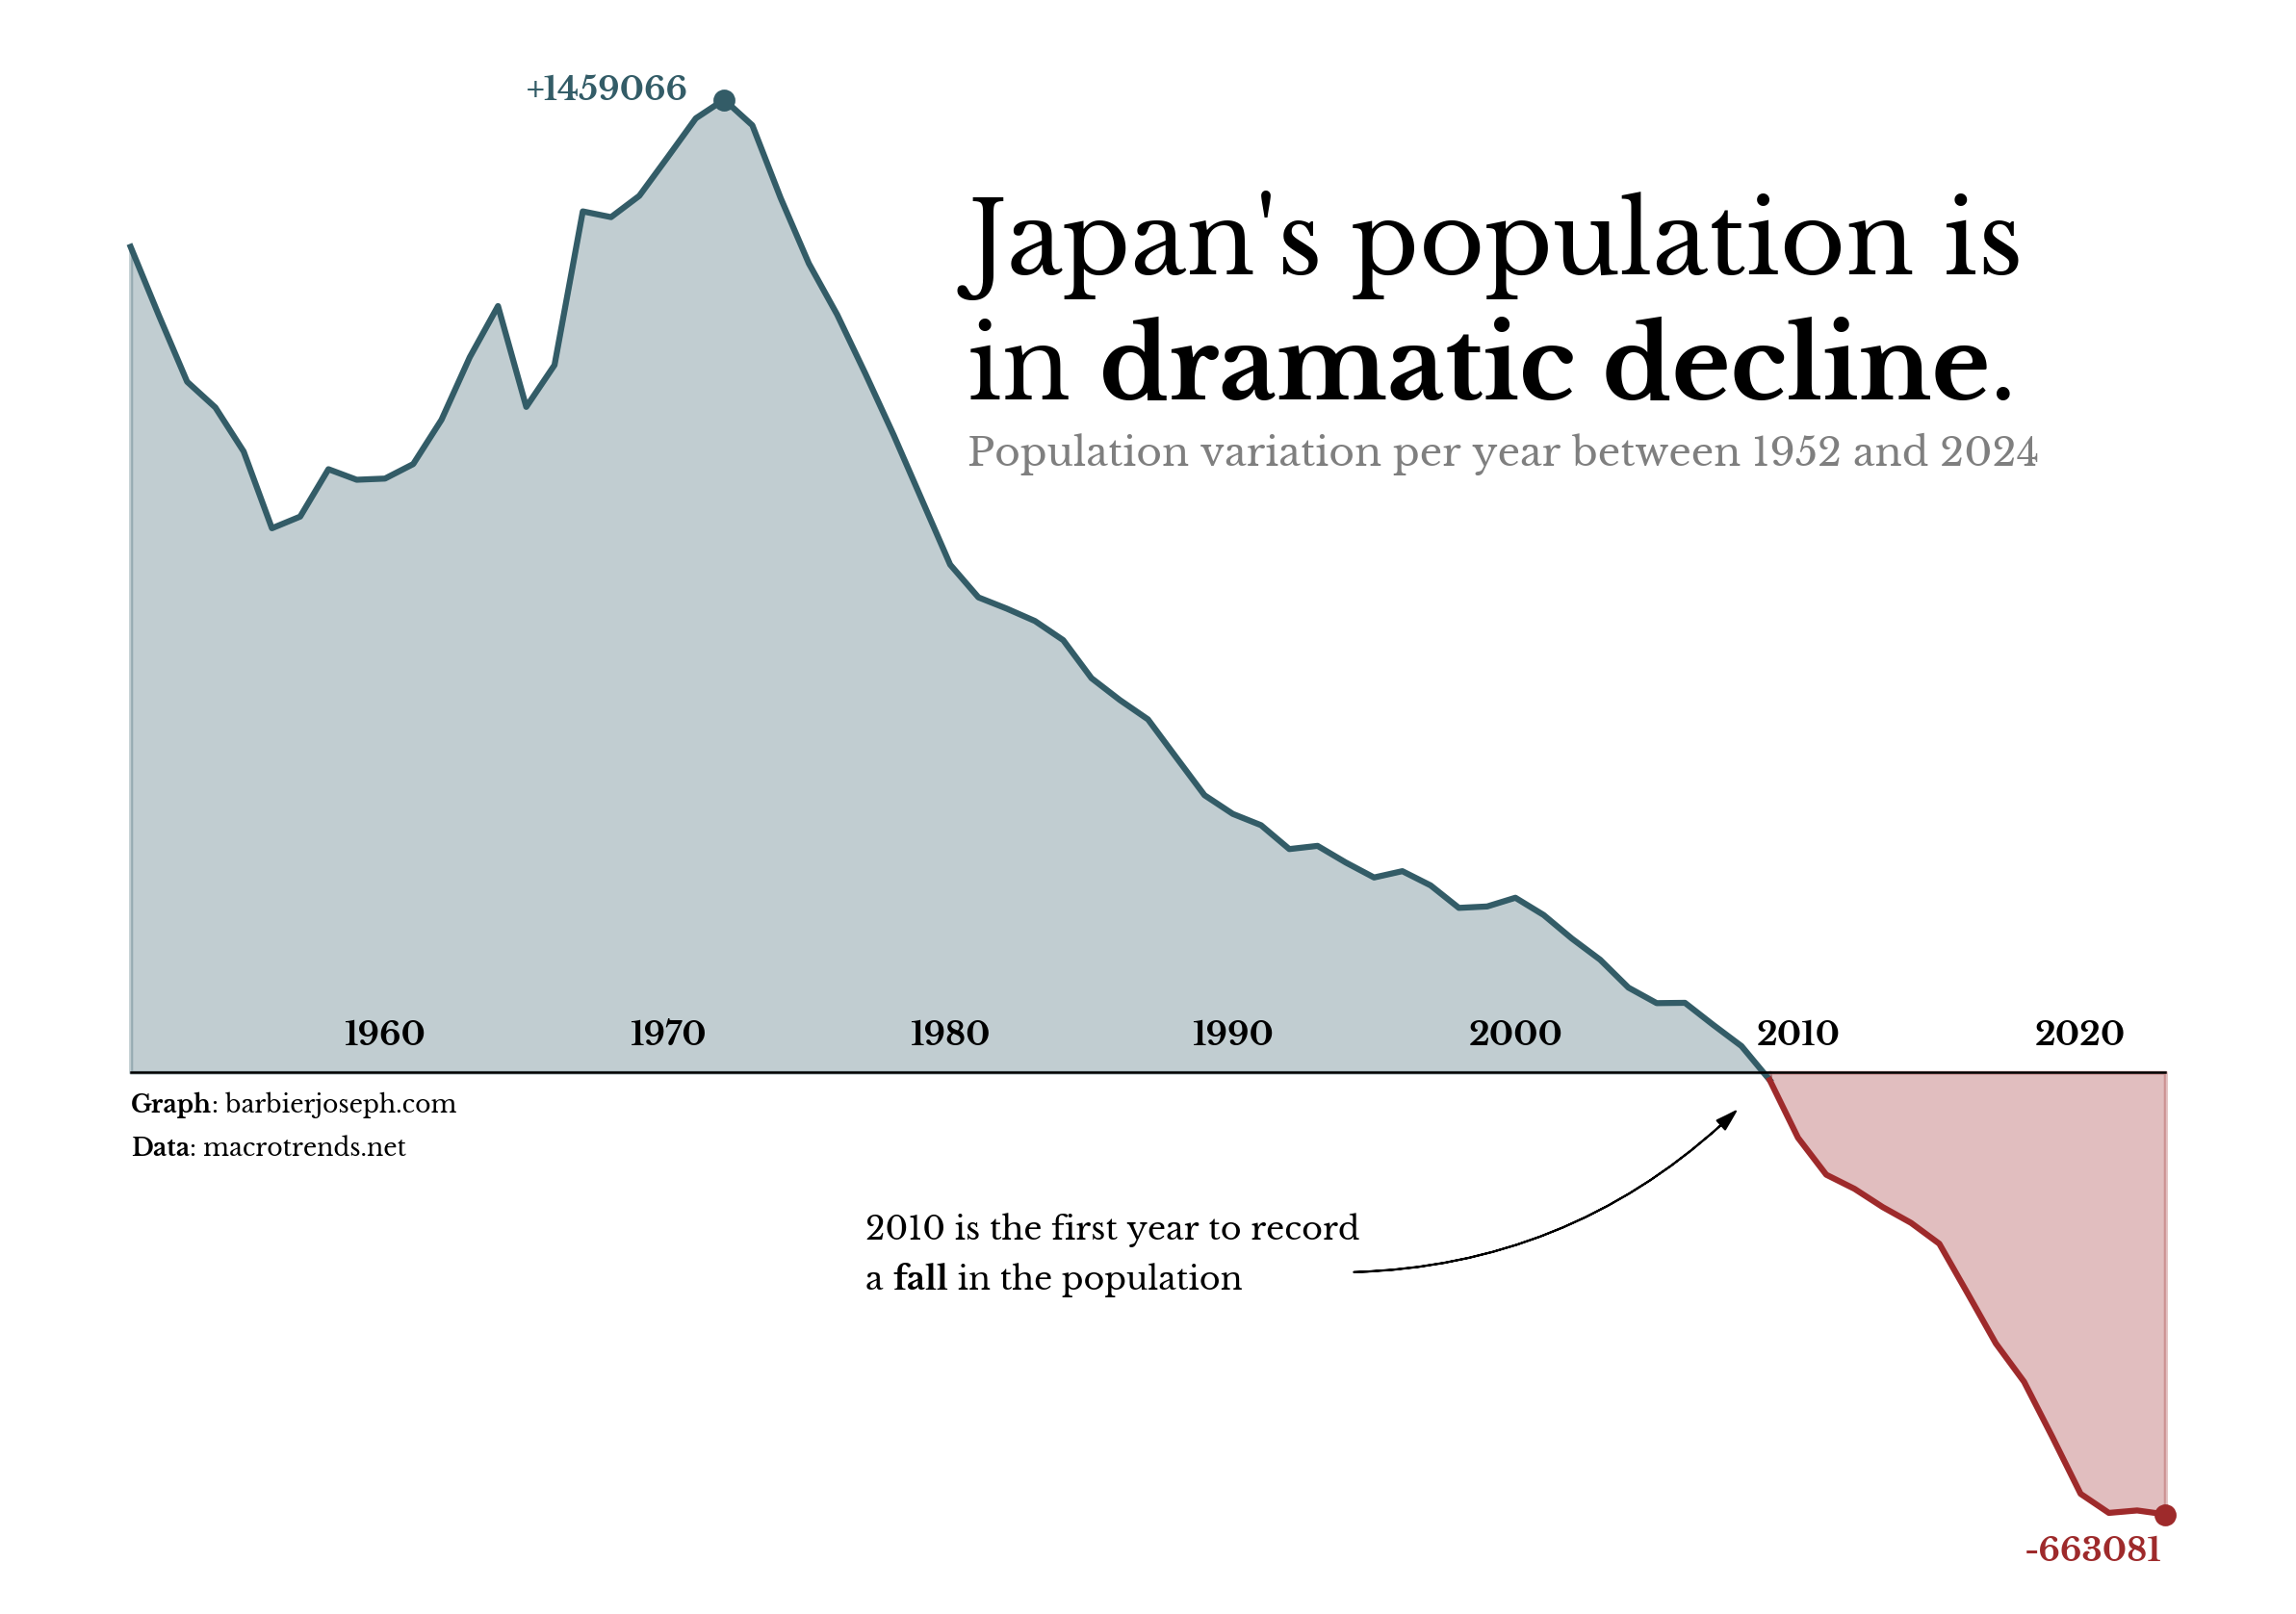

In [15]:
# style parameters
font = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Regular.ttf?raw=true'
)
boldfont = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Bold.ttf?raw=true'
)
arrow_props = dict(color='black', tail_width=0.05, linewidth=0.5, head_width=3, head_length=5, radius=0.2)

fig, ax = plt.subplots(dpi=300, figsize=(10,7))
ax.set_axis_off()

# before
color = '#335c67'
year_index = df[df['flag']].date.values[0]
before_df = df[df['date']<=year_index]
ax.plot(before_df['date'], before_df['pop_var'], color=color)
ax.fill_between(before_df['date'], before_df['pop_var'], alpha=0.3, color=color)
max_year = df[df['pop_var']==df['pop_var'].max()].date.values[0]
max_value = df[df['pop_var']==df['pop_var'].max()].pop_var.values[0]
ax.scatter(x=max_year, y=max_value, color=color, s=20)
ax.text(x=max_year-7, y=max_value, s=f'+{max_value:.0f}', font=boldfont, size=8, color=color)

# after
color = '#9e2a2b'
after_df = df[df['date']>=year_index]
ax.plot(after_df['date'], after_df['pop_var'], color=color)
ax.fill_between(after_df['date'], after_df['pop_var'], alpha=0.3, color=color)
min_year = df[df['pop_var']==df['pop_var'].min()].date.values[0]
min_value = df[df['pop_var']==df['pop_var'].min()].pop_var.values[0]
ax.scatter(x=min_year, y=min_value, color=color, s=20)
ax.text(x=min_year-5, y=min_value-70000, s=f'{min_value:.0f}', font=boldfont, size=8, color=color)

ax.plot([1952, 2024], [0,0], color='black', linewidth=0.6)
year_range = range(1960, 2021, 10)
for year in year_range:
   ax.text(x=year+1, y=40000, s=f'{year}', font=boldfont, size=8, ha='center')

s = "Japan's population is\nin <dramatic decline>."
fig_text(x=0.45, y=0.8, s=s, font=font, highlight_textprops=[{'font':boldfont}], fontsize=25, ha='left', va='top')

s = "Population variation per year between 1952 and 2024"
fig_text(x=0.45, y=0.68, s=s, font=font, fontsize=9.8, ha='left', va='top', alpha=0.5)

s = "<Graph>: barbierjoseph.com\n<Data>: macrotrends.net"
ax_text(x=1952, y=-30000, s=s, font=font, fontsize=6, ha='left', highlight_textprops=[{'font':boldfont}]*2)

s = "2010 is the first year to record\na <fall> in the population"
ax_text(x=1978, y=-210000, s=s, font=font, fontsize=8, ha='left', highlight_textprops=[{'font':boldfont}])
ax_arrow(tail_position=(1995, -300000), head_position=(2009, -50000), ax=ax, **arrow_props)

plt.savefig('../../static/graph/web-minimalist-area-chart.png', dpi=300)
plt.show()

## Going further

You might be interested in:

- the [area chart section](/area-plot) of the gallery
- how to create [arrow with an inflexion point](/591-arrows-with-inflexion-point) in a plot
- how to make a [beautiful stacked area chart](/web-stacked-area-with-inflexion-arrows)
